In [1]:
import tensorflow as tf
from svhn_dataset import SVHN
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from augment import augment

In [2]:
dataset = [d for d in SVHN().train.shuffle(128).map(SVHN.parse).take(40)]

#transformations: rotation, translation, sheer, zoom
#bbox: (top, left, bottom, right)
bboxes = [d['bboxes'] for d in dataset]
classes = [d['classes'] for d in dataset]
image = [d['image'] for d in dataset]

In [3]:
def draw_image_and_bb(image, bbs):
    #print(f'size: {image.shape}')
    plt.imshow(image)
    ax = plt.gca()
    for bb in bbs:
        ymin, xmin, ymax, xmax = bb.numpy()
        y, x = (ymin + ymax) / 2, (xmin + xmax) / 2
        h, w = (ymax - ymin), (xmax - xmin)
        rect = patches.Rectangle((xmin, ymin),w,h,linewidth=2,edgecolor='r',facecolor='none')
        ax.add_patch(rect)
    plt.show()

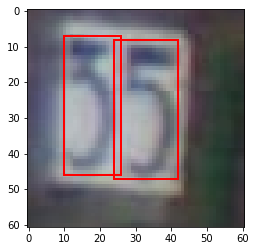

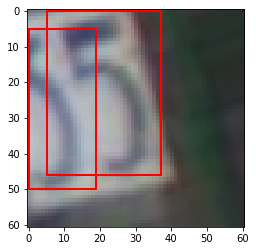

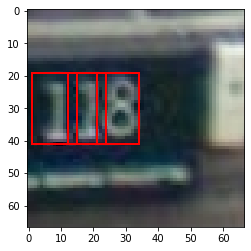

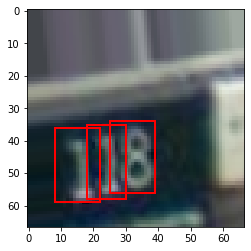

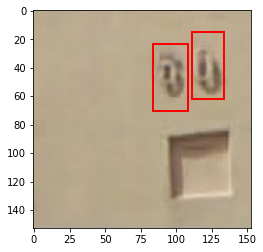

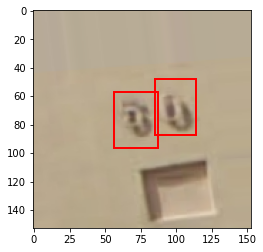

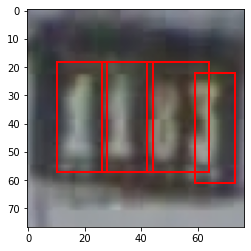

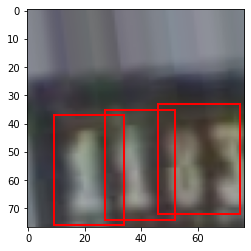

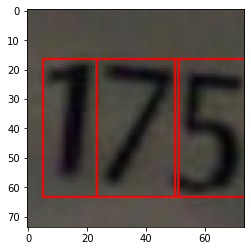

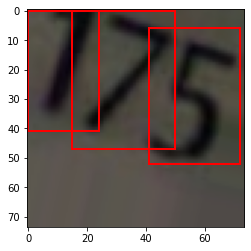

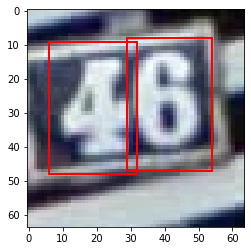

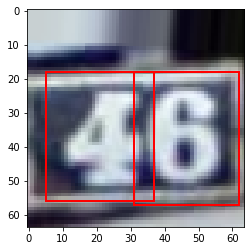

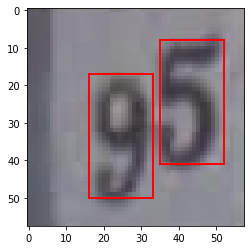

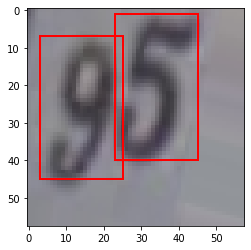

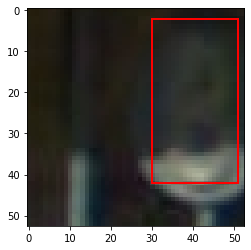

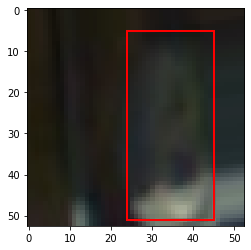

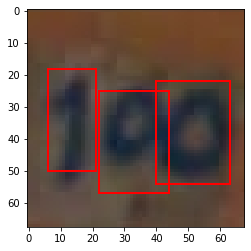

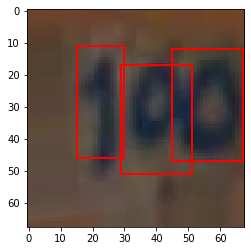

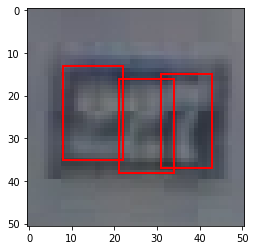

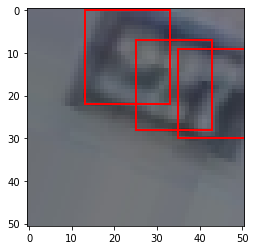

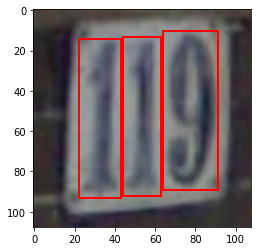

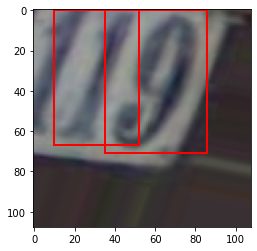

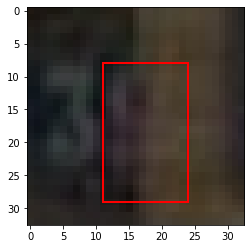

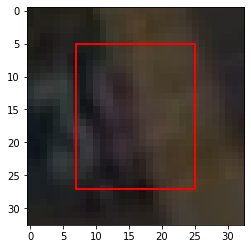

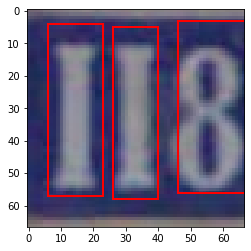

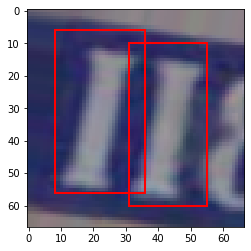

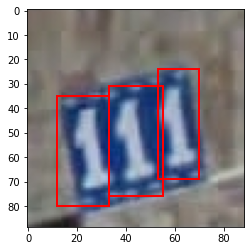

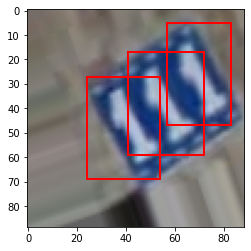

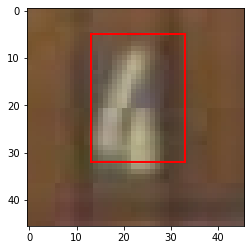

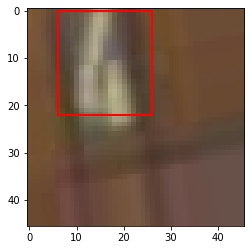

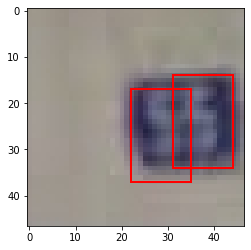

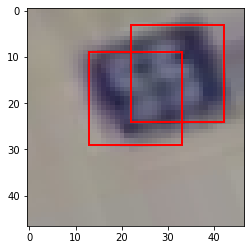

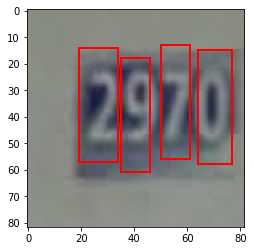

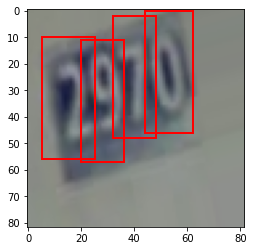

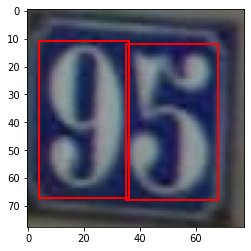

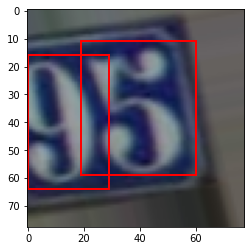

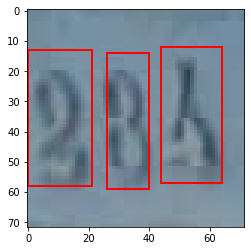

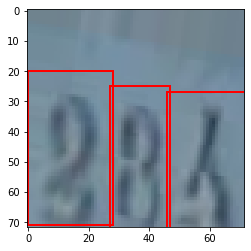

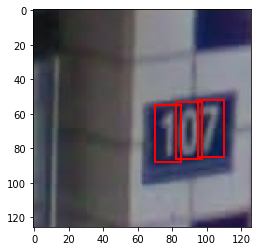

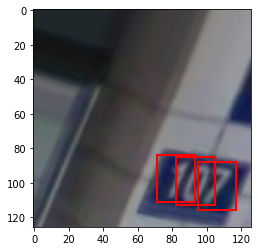

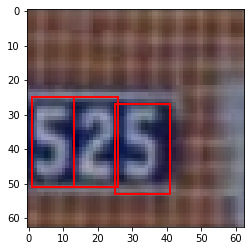

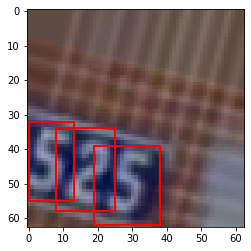

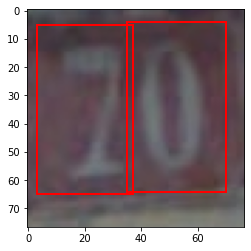

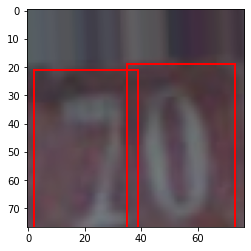

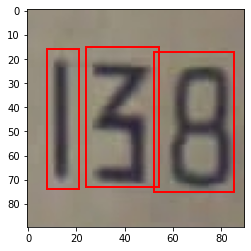

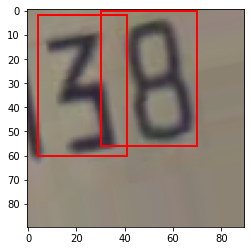

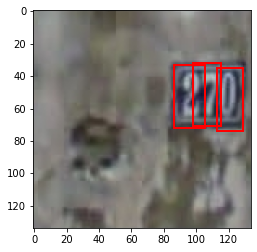

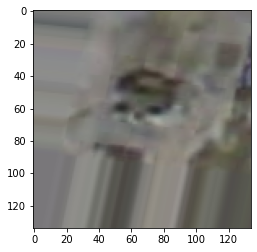

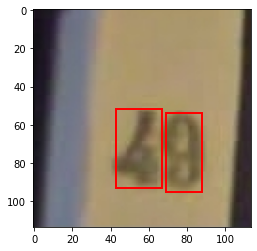

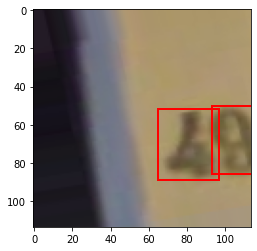

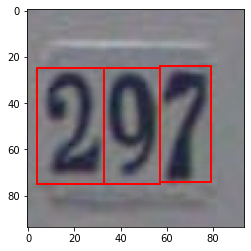

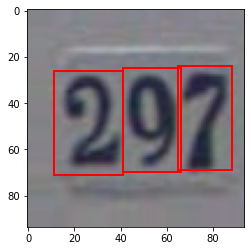

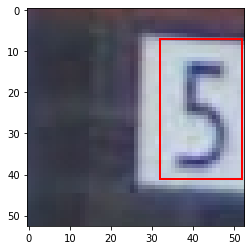

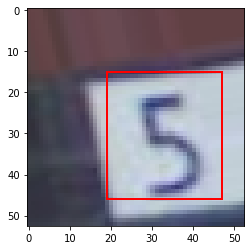

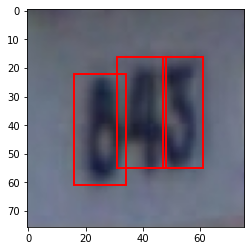

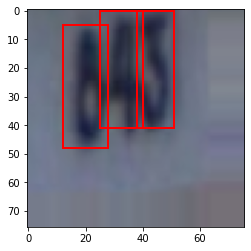

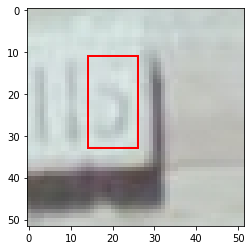

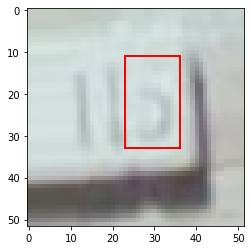

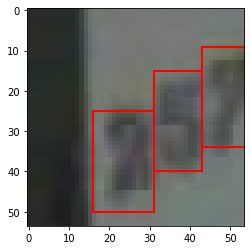

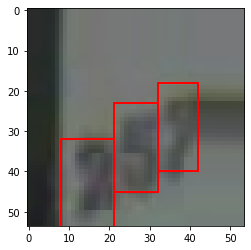

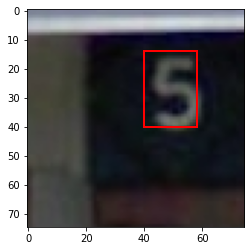

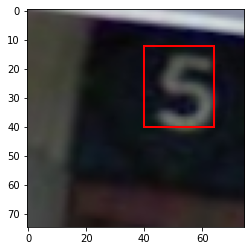

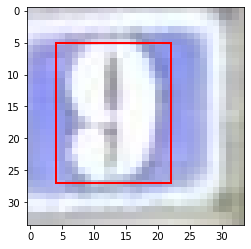

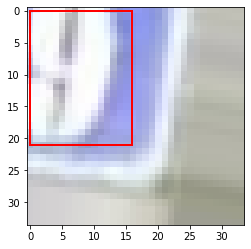

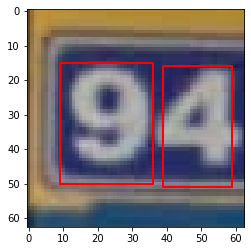

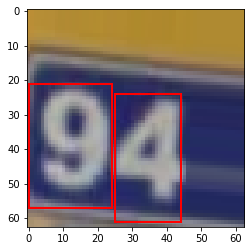

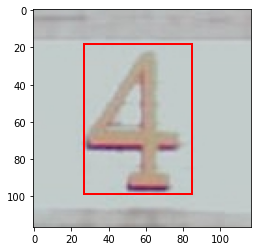

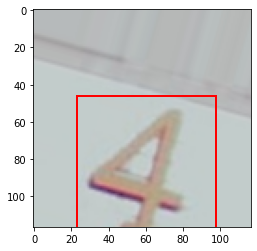

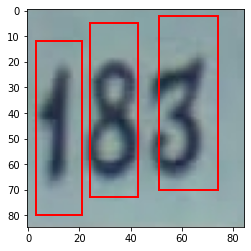

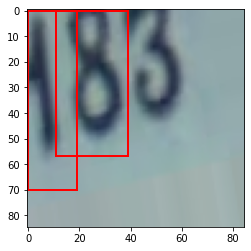

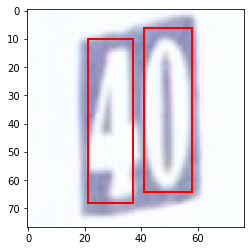

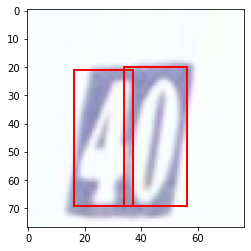

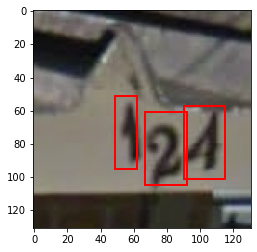

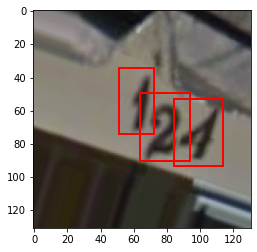

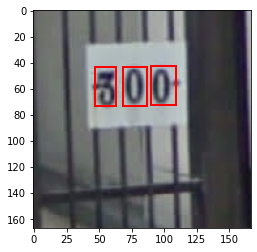

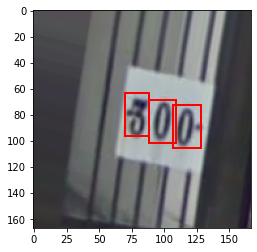

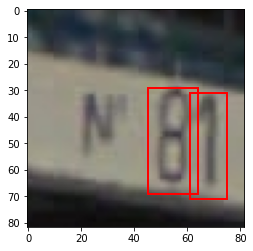

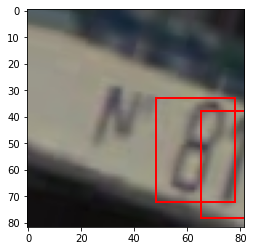

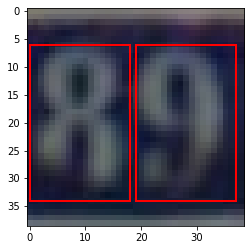

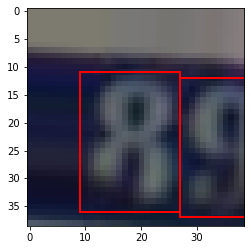

In [7]:
for img, bbox in zip(image, bboxes):
    #print("-----NEXT------")
    draw_image_and_bb(img, bbox)
    tranformed_img, transformed_bbox = augment(img, bbox, 
                                               width_shift=0.25, height_shift=0.25, 
                                               zoom=0.2,
                                               rotation=20, 
                                               vertical_fraction=0.6, horizontal_fraction=0.9,
                                               iou_threshold=0.6)
    draw_image_and_bb(tranformed_img, transformed_bbox)